# Summary

In this notebook, we performed the investigation  of the problem and the exploratory data analysis.

Additionally, several outliers and incorrect measurements were corrected in the data. Almost all corrections were done mathematically, except few samples with not possible reconstruction (the mean was used for data imputation in those cases).

# Modules

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Working directory
We set the working directory to the project folder (currently is in the notebooks folder)

In [2]:
current_directory = os.getcwd()
if os.path.basename(current_directory) == 'notebooks':
    os.chdir('./..')

# Data import

In [3]:
train = pd.read_csv('./data/competition_data/train.csv', index_col='id')
test = pd.read_csv('./data/competition_data/test.csv', index_col='id')
original_data = pd.read_csv('./data/original_data/cubic_zirconia.csv', index_col=0)
variable_descriptions = pd.read_excel('./data/original_data/Data Dictionary.xlsx', index_col='Variable Name')

In [4]:
# Combination of all daata in the same dataset
train['origin'] = 'train'
test['origin'] = 'test'
original_data['origin'] = 'original_data'
all_data = pd.concat([train, test, original_data], ignore_index=True)
all_data['origin'].value_counts()

train            193573
test             129050
original_data     26967
Name: origin, dtype: int64

In [5]:
for var, desc in variable_descriptions.iterrows():
    print(f'+ {var}: {desc.iloc[0]}')

+ Carat:  Carat weight of the cubic zirconia.
+ Cut:  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
+ Color :  Colour of the cubic zirconia.With D being the best and J the worst.
+ Clarity:  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
+ Depth:  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
+ Table:  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
+ Price:  the Price of the cubic zirconia.
+ X:  Length of the cubic zirconia in mm.
+ Y:  Width of the cubic zirconia in mm.
+ Z:  Height of the cubic zirconia in mm.


# Problem research

The principal datasource for knowledge was gathered looking for diamonds characteristics, since it's easier getting properties and information of them. Mostly of the info was gathered from *GIA: Gemological Institute Of America*, but also from other sources were used (More details at the end of this section).

The cubic zirconia is the fisrt competitor with the diamons from 1976. This element is a sintetic component, which is a little less expesive as is diamonds.


Terminology and definitions:
+ Cubic zirconia (CZ) is a reference name for the sintetic version of the diamond, with the following parts

![diamond_parts](https://www.everything-wedding-rings.com/images/diamondanatomyimproved.jpg)

+ The scale for measure diamon quality is called 4Cs, based in color, clarity, cut and carat weight.
    + Color: grade of whiteness of the diamond. Its scored by letters from D to Z. Where D is the best (translucent white) and Z the worst (yellow tonalities). There are some similar diamond colors in the scale ([10]):
    
    ![color_scale](https://4cs.gia.edu/wp-content/uploads/2013/03/diamond-color.jpg)
    
    + Clarity: if the gem has some imperfections. There is a complete scale from perfection (FL) to obviously visible defects (I3). The scale is referenced in diferent levels of visibility in zoom x10 and possition of the inperfections, and the numerical values indicates 1 for inperfection in the borders and 2 for inperfection in the center, as sowed in the image ([2]):
    
    ![clarity_scale](https://cdn.shopify.com/s/files/1/0964/9808/files/diamond_clarity_grades_chart_grande.jpg?v=1536201749)
    
    + Cut: how well it is cut. The perfect cut refractes the light from the same path that enters. That can be seen in the next image ([6])
    ![cut_examples](https://www.diamonds.pro/wp-content/uploads/2022/04/cuts-blue-1018x1024.png)
    
    + Carat: it is an unit for weight, where 1 carat is 200 milligrams. So, more carats, more size (but no more price or quality, since there are other factors). In the next image ([13]) we can see the sizes diferences.
    
    ![diamond_carat_sizes](https://www.shiningdiamonds.co.uk/skin/frontend/rwd/shining2018/images/diamond_carat_chart.jpg)
    
+ Culet: pointy part of the cubic zirconia. It can be no so pointy in several cases, but this is adesirable element, since less pointy implies more easy to get damaged. So, no culet (there is a complete scale defined in [4]) is the best option.


References:
1. https://en.wikipedia.org/wiki/Cubic_zirconia
2. https://www.u7jewelry.com/blogs/jewelry-guide/czcubic-zirconia-vs-diamond
3. https://4cs.gia.edu/en-us/diamond-clarity/
4. https://www.diamonds.pro/education/diamond-culet/
5. https://diamondbuzz.blog/diamond-girdle-is-it-important/
6. https://diamonds.pro/education/cuts/
7. https://www.shiningdiamonds.co.uk/diamond-buying-guide/diamond-carat
8. https://www.everything-wedding-rings.com/carat-difference-in-size-in-cubic-zirconia.html
9. https://4cs.gia.edu/en-us/4cs-diamond-quality/#:~:text=Then%20in%20the%201940s%2C%20Robert,clarity%2C%20cut%20and%20carat%20weight
10. https://4cs.gia.edu/en-us/blog/diamond-color-chart-official-gia-color-scale/
11. https://4cs.gia.edu/en-us/diamond-cut/
12. https://www.petragems.com/education/diamond-pavilion-angle/
13. https://www.shiningdiamonds.co.uk/diamond-buying-guide/diamond-carat
14. https://www.everything-wedding-rings.com/diamond-terms.html

# EDA

## Statistical descriptions

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349590 entries, 0 to 349589
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    349590 non-null  float64
 1   cut      349590 non-null  object 
 2   color    349590 non-null  object 
 3   clarity  349590 non-null  object 
 4   depth    348893 non-null  float64
 5   table    349590 non-null  float64
 6   x        349590 non-null  float64
 7   y        349590 non-null  float64
 8   z        349590 non-null  float64
 9   price    220540 non-null  float64
 10  origin   349590 non-null  object 
dtypes: float64(7), object(4)
memory usage: 29.3+ MB


In [7]:
all_data.describe()

,carat,depth,table,x,y,z,price
count,349590.000000,348893.000000,349590.000000,349590.000000,349590.000000,349590.000000,220540.000000
mean,0.790752,61.814876,57.249699,5.715125,5.719746,3.533638,3965.531450
std,0.463803,1.109733,1.945743,1.111003,1.107441,0.692092,4033.215125
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.200000,56.000000,4.700000,4.710000,2.900000,949.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2398.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5405.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Nans by column and set

In [8]:
all_data.groupby('origin').apply(lambda x: x.isna().sum()).T

origin,original_data,test,train
carat,0,0,0
cut,0,0,0
color,0,0,0
clarity,0,0,0
depth,697,0,0
table,0,0,0
x,0,0,0
y,0,0,0
z,0,0,0
price,0,129050,0


We have depth nan values in our original data, and our price nans in test (as it should be).

The depth value was obtained as *The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.* We already know the height which is our *z* value, so if we can get the average Girdle Diameter from the data, we could get our depth values for the original data.

### Conclusions

At a first look to the statistical description, we have several issues:
+ Only depth have nan values. We will check this in the next section.
+ x, y, and z have 0 values. We will check this in a further section.
+ There are two possible outliers in y and z values, since respectivily 58.9 and 31.8 are too high for those distributions.

By definition, we have the next mathematical relation

$$ Depth \% = \frac{z}{Avg Girdle Diameter} \longrightarrow z = Depth \% \times Avg Girdle Diameter $$

Where, we only need to know the $Avg Girdle Diameter$ and $z$ values to obtain Depth. Or, knowing Depth and $Avg Girdle Diameter$ we can get those $z = 0$

So, if we take a look to the image which describes the gem parts, we can asume

$$
Avg Girdle Diameter=
\begin{cases}
\frac{x + y}{2} \qquad if \quad x \ne 0, y \ne 0\\
x \qquad if \quad x \ne 0, y = 0\\
y \qquad if \quad x = 0, y \ne 0
\end{cases}
$$

When the only unique extra case of $x = 0, y = 0$, which we will define in its own section.

## Average Girdle Diameter

As defined above, we can obtain the avg girdle diameter using x and y. We only need to bring special attention in those values with 0

In [9]:
all_data['avg_girdle_diameter'] = all_data[['x', 'y']].mean(axis=1)
# When we have a 0 in x or y, we replace the mean by the max value
x_y_0_index = (all_data[['x', 'y']] == 0).any(axis=1)
all_data.loc[x_y_0_index, 'avg_girdle_diameter'] = all_data.loc[x_y_0_index, ['x', 'y']].max(axis=1)

**Note:** when $x = 0, y = 0$, we have $Avg Girdle Diameter=0$. We will solve this in the further sections.

## Inputation of Depth's nans

We check if there is some record with nan depth and Average Girdle Diameter 0. Because in those cases, we will not be able to fill the missings values.

In [10]:
conflictive_index = (all_data['depth'].isna()) & (all_data['avg_girdle_diameter'] == 0)
print('We have a total of', conflictive_index.sum(), 'values with Depth nan and Average Girdle Diameter 0')

conflictive_index = (all_data['depth'].isna()) & (all_data['z'] == 0)
print('We have a total of', conflictive_index.sum(), 'values with Depth nan and z=0')

We have a total of 0 values with Depth nan and Average Girdle Diameter 0
We have a total of 0 values with Depth nan and z=0


As we have all the data needed for the variable generation, we can obtain Depth from $z$ and $Avg Girdle Diameter$

In [11]:
all_data['stimated_depth'] = 100*all_data['z']/all_data['avg_girdle_diameter']

Let's compare the real value vs the stimated.

**Note:** we have nans in the two items, the Depth ones by default, adn the generated depth ones when $Avg Girdle Diameter=0$

<AxesSubplot:>

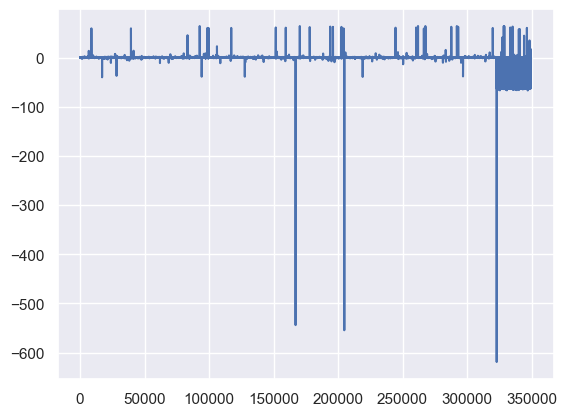

In [12]:
(all_data['depth'].fillna(0) - all_data['stimated_depth'].fillna(0)).plot()

If we look at the previous comparative, we have:
+ 3 extremly differences between the real and the stimated. This can be happening by the huge $z=31.8$ detected in the statistical analysis
+ Several positive diferences due to values of $z=0$ or $Avg Girdle Diameter=0$
+ Several negative values at the tail, which are related to the real Depth nans

For this section, we achieved our goal, which was obtain a method to input the nan values in Depth. In the next section we will chech those outliers.

## Outliers in x, y, z

First, let's see how the values are distributed in each variable.

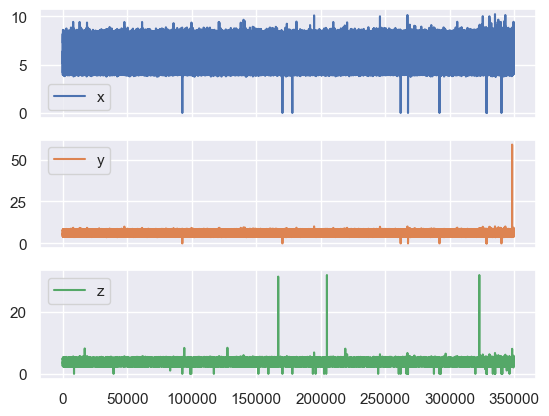

In [13]:
all_data[['x', 'y', 'z']].plot(subplots=True)
plt.show()

We have several 0 values for x, y, and z, but also some extreme values for *y* (1) and *z* (3). Let's take a look first to those extreme values

### Extreme high values in x, y, z

In [14]:
all_data[(all_data[['x', 'y', 'z']] > 20).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price,origin,avg_girdle_diameter,stimated_depth
167044,0.51,Premium,G,VS2,61.8,58.0,5.20,5.13,31.30,1447.0,train,5.165,606.001936
204824,0.51,Ideal,G,VS2,61.6,54.0,5.15,5.17,31.80,NaN,test,5.160,616.279070
322967,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.80,1970.0,original_data,5.135,619.279455
348418,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210.0,original_data,33.495,24.063293


As we defined depth from $z$ and $Avg Girdle Diameter$, we can also get a corrected $z$ from Depth and $Avg Girdle Diameter$. But, there is a problem, one of the depths is nan and has an extreme value in z, so we will not be able to apply tehe formulas for that record.

The others can be easily corrected as follows:
+ Extreme y value can be replaced by the x value
+ The extreme z values can be replaced by the output of the formula $z = Depth \% \times Avg Girdle Diameter$

### Zero values in x, y, z

In [15]:
zero_measurements = all_data[(all_data[['x', 'y', 'z']] == 0).any(axis=1)]
print(len(zero_measurements), 'gems have at least 1 zero measure')
zero_measurements

33 gems have at least 1 zero measure


,carat,cut,color,clarity,depth,table,x,y,z,price,origin,avg_girdle_diameter,stimated_depth
8750,1.02,Premium,H,SI2,59.4,61.0,6.57,6.53,0.0,4144.0,train,6.550,0.0
39413,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842.0,train,8.435,0.0
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130.0,train,0.000,NaN
98719,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923.0,train,8.390,0.0
99624,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221.0,train,8.430,0.0
117161,2.20,Premium,F,SI2,60.3,58.0,8.49,8.45,0.0,15188.0,train,8.470,0.0
151690,2.18,Premium,I,VS2,61.2,62.0,8.45,8.37,0.0,15701.0,train,8.410,0.0
159429,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938.0,train,8.400,0.0
170318,0.71,Good,D,VS2,64.1,60.0,0.00,0.00,0.0,910.0,train,0.000,NaN
178000,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.0,2130.0,train,6.710,0.0


Looking at the values, we have 3 cases (not mutually exclusive):
+ z is 0
+ x or y is 0
+ x, y, and z are 0

#### Case z=0
In the case of $ z=0 $, we can see that all depths are no nan. So, if we use the next formula, we can get an estimated z

$$ Depth \% = \frac{z}{Avg Girdle Diameter} \longrightarrow z = Depth \% \times Avg Girdle Diameter $$

Also, this new z can be used to correct the outliers.

In [16]:
all_data['stimated_z'] = all_data['depth']*all_data['avg_girdle_diameter']/100  # Remember: depth is a pct
all_data[(all_data[['x', 'y', 'stimated_z']] == 0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price,origin,avg_girdle_diameter,stimated_depth,stimated_z
92703,0.71,Good,F,SI1,64.1,60.0,0.0,0.00,0.0,2130.0,train,0.00,NaN,0.0000
170318,0.71,Good,D,VS2,64.1,60.0,0.0,0.00,0.0,910.0,train,0.00,NaN,0.0000
178000,0.71,Very Good,F,SI2,62.0,60.0,0.0,6.71,0.0,2130.0,train,6.71,0.0,4.1602
261979,0.71,Good,G,SI1,64.2,59.0,0.0,0.00,0.0,NaN,test,0.00,NaN,0.0000
267686,0.71,Very Good,F,SI2,64.1,56.0,0.0,0.00,0.0,NaN,test,0.00,NaN,0.0000
292088,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,NaN,test,0.00,NaN,0.0000
328444,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130.0,original_data,0.00,NaN,0.0000
328838,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130.0,original_data,0.00,NaN,0.0000
340129,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0,6381.0,original_data,0.00,NaN,0.0000


Now, we have only one $x=0$ and $y \neq 0$, and the rest of the 0 values are x, y, z at the same time zero. So:
+ For the only one $x=0$, we will replace it for the y value
+ For the cases of x, y, z all zero, we need to stimate the values from CZ with the same characteristics. This means look for equivalent records and stimate the values to replace them. This will be done in the next section.

### Outlier handling

To maintain our original values, we will generate new variables for those which will be inputted.

In [17]:
all_data[['new_x', 'new_y', 'new_z', 'new_depth']] = all_data[['x', 'y', 'z', 'depth']].copy()
all_data

,carat,cut,color,clarity,depth,table,x,y,z,price,origin,avg_girdle_diameter,stimated_depth,stimated_z,new_x,new_y,new_z,new_depth
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0,train,7.300,62.328767,4.540600,7.27,7.33,4.55,62.2
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0,train,8.090,62.422744,5.015800,8.06,8.12,5.05,62.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0,train,5.710,61.295972,3.494520,5.69,5.73,3.50,61.2
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0,train,4.395,61.660978,2.707320,4.38,4.41,2.71,61.6
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0,train,7.630,62.516383,4.776380,7.65,7.61,4.77,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349585,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408.0,original_data,6.565,62.300076,4.089995,6.61,6.52,4.09,62.3
349586,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114.0,original_data,4.430,61.851016,2.742170,4.44,4.42,2.74,61.9
349587,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656.0,original_data,5.135,61.733204,3.168295,5.12,5.15,3.17,61.7
349588,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682.0,original_data,4.195,61.978546,2.592510,4.19,4.20,2.60,61.8


We have two kind of outliers:
1. Directly replazable: those which can be recovered from mathematical operations.
2. Data inferenciable: those which we will need to estimate from similar data.

We define a method to estimate the x, y, z coordinates from the data:
1. We need to get a subset of valuable data. We can not generate new values using test or values already wrong.
2. We will find similar values using the variables carat, cut and table, since the first one references the mass (and is volume related), and the second one refers to de quality of the cut, which can be related with the dimensions of the CZ.
3. Once we have all the equivalents, we can replace the values by its references.

In [18]:
not_usable_index = (
    (all_data[['x', 'y', 'z']] == 0).any(axis=1) | \
    (all_data[['x', 'y', 'z']] >= 20).any(axis=1) | \
    (all_data['depth'].isna()) | \
    (all_data['origin'] == 'test')
)
data_for_inferenciate = all_data[~not_usable_index]

We generated the mean value for each (Carat, Cut) combination

In [19]:
data_means = data_for_inferenciate.groupby(['carat', 'cut']).mean()
data_means

depth      table          x          y         z  \
carat cut                                                               
0.20  Good       59.566667  62.333333   3.853333   3.820000  2.310000   
      Ideal      61.916667  56.333333   3.818333   3.813333  2.340000   
      Premium    61.060870  60.043478   3.790000   3.759565  2.307826   
      Very Good  61.716667  59.666667   3.783333   3.813333  2.345000   
0.21  Fair       61.300000  59.500000   3.875000   3.875000  2.495000   
...                    ...        ...        ...        ...       ...   
3.50  Very Good  62.800000  57.000000   9.650000   9.590000  6.030000   
3.51  Premium    62.500000  59.000000   9.660000   9.630000  6.030000   
4.00  Very Good  63.300000  58.000000  10.010000   9.940000  6.310000   
4.01  Premium    61.750000  61.500000  10.080000  10.020000  6.205000   
4.50  Fair       65.800000  58.000000  10.230000  10.160000  6.720000   

                        price  avg_girdle_diameter  stimated_depth  \
carat cut                                                            
0.20  Good         367.000000             3.836667       60.246071   
      Ideal        367.166667             3.815833       61.320138   
      Premium      369.956522             3.774783       61.142464   
      Very Good    360.500000             3.798333       61.759624   
0.21  Fair         370.000000             3.875000       64.338774   
...                       ...                  ...             ...   
3.50  Very Good  18507.000000             9.620000       62.681913   
3.51  Premium    18701.000000             9.645000       62.519440   
4.00  Very Good  15984.000000             9.975000       63.258145   
4.01  Premium    15223.000000            10.050000       61.746715   
4.50  Fair       18531.000000            10.195000       65.914664   

                 stimated_z      new_x      new_y     new_z  new_depth  
carat cut                                                               
0.20  Good         2.283798   3.853333   3.820000  2.310000  59.566667  
      Ideal        2.362661   3.818333   3.813333  2.340000  61.916667  
      Premium      2.304721   3.790000   3.759565  2.307826  61.060870  
      Very Good    2.343270   3.783333   3.813333  2.345000  61.716667  
0.21  Fair         2.372750   3.875000   3.875000  2.495000  61.300000  
...                     ...        ...        ...       ...        ...  
3.50  Very Good    6.041360   9.650000   9.590000  6.030000  62.800000  
3.51  Premium      6.028125   9.660000   9.630000  6.030000  62.500000  
4.00  Very Good    6.314175  10.010000   9.940000  6.310000  63.300000  
4.01  Premium      6.205350  10.080000  10.020000  6.205000  61.750000  
4.50  Fair         6.708310  10.230000  10.160000  6.720000  65.800000  

[1094 rows x 13 columns]

We define the subset which we will correct

In [20]:
null_xyz = all_data[(all_data[['x', 'y', 'stimated_z']] == 0).all(axis=1)]
null_xyz

,carat,cut,color,clarity,depth,table,x,y,z,price,origin,avg_girdle_diameter,stimated_depth,stimated_z,new_x,new_y,new_z,new_depth
92703,0.71,Good,F,SI1,64.1,60.0,0.0,0.0,0.0,2130.0,train,0.0,NaN,0.0,0.0,0.0,0.0,64.1
170318,0.71,Good,D,VS2,64.1,60.0,0.0,0.0,0.0,910.0,train,0.0,NaN,0.0,0.0,0.0,0.0,64.1
261979,0.71,Good,G,SI1,64.2,59.0,0.0,0.0,0.0,NaN,test,0.0,NaN,0.0,0.0,0.0,0.0,64.2
267686,0.71,Very Good,F,SI2,64.1,56.0,0.0,0.0,0.0,NaN,test,0.0,NaN,0.0,0.0,0.0,0.0,64.1
292088,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,NaN,test,0.0,NaN,0.0,0.0,0.0,0.0,64.1
328444,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130.0,original_data,0.0,NaN,0.0,0.0,0.0,0.0,64.1
328838,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130.0,original_data,0.0,NaN,0.0,0.0,0.0,0.0,64.1
340129,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381.0,original_data,0.0,NaN,0.0,0.0,0.0,0.0,57.5


As first correction, we will replace all the x, y, z zero values

In [21]:
for id_, row in null_xyz.iterrows():
    similar_values = data_means.loc[(row['carat'], row['cut'])]
    all_data.loc[id_, ['new_x', 'new_y', 'new_z']] = similar_values[['x', 'y', 'z']].values

As second correction, we repair the unique value of Depth nan and z outlier (we only correct the z value)

In [22]:
wrong_depth_and_z = all_data[(all_data['depth'].isna()) & (all_data['z'] >= 20)]
for id_, row in wrong_depth_and_z.iterrows():
    similar_values = data_means.loc[(row['carat'], row['cut'])]
    all_data.loc[id_, 'new_z'] = similar_values['z']

As third correction, we repair the unique value of $x=0$ and $y, z \neq 0$

In [23]:
correction_index = all_data['new_x'] == 0
all_data.loc[correction_index, 'new_x'] = all_data.loc[correction_index, 'new_y']

As fourth correction, we replace the outlier values in $y$ for the value in $x$

In [24]:
correction_index = all_data['new_y'] >= 20
all_data.loc[correction_index, 'new_y'] = all_data.loc[correction_index, 'new_x']

As fifth correction, we reevaluate the avg Girdle Diameter, which is used to recalculate the values of z in the outlier and 0 cases.

In [25]:
all_data['avg_girdle_diameter'] = all_data[['new_x', 'new_y']].mean(axis=1)
stimated_z = all_data['depth']*all_data['avg_girdle_diameter']/100

correction_index = (all_data['new_z'] == 0) | (all_data['new_z'] >= 20)
all_data.loc[correction_index, 'new_z'] = stimated_z[correction_index]

As the last correction, we generate the estimated depth for those items with depth nan

In [26]:
stimated_depth = 100*all_data['new_z']/all_data['avg_girdle_diameter']

correction_index = all_data['new_depth'].isna()
all_data.loc[correction_index, 'new_depth'] = stimated_depth[correction_index]

With all the values corrected, we can now proceed with the complete eda of the other variables and the variable correlations.

In [27]:
# We delete the non important variables
all_data = all_data.drop(columns=['stimated_depth', 'stimated_z'])

### Incongruent measurements
For several points, we have incongruences between the variables x, y, z, and depth. This happens when the theoretical depth and the calculated depth from x, y, and z aren't the same.

Let $depth_{xy}$, $depth_{x}$ and $depth_{y}$ the depths calculated using $z$ as numerator and $mean(x, y)$, $x$, and $y$ as denominator respectively.

In the case of a wrong $z$, we will have:
$$ depth_{xy} \neq depth \qquad depth_{x} \neq depth \qquad depth_{y} \neq depth $$

In the case of a wrong $x$, we will have:
$$ depth_{xy} \neq depth \qquad depth_{x} \neq depth \qquad depth_{y} \simeq depth $$

In the case of a wrong $y$, we will have:
$$ depth_{xy} \neq depth \qquad depth_{x} \simeq depth \qquad depth_{y} \neq depth $$

So, if we calculate all the version of depth, we can determine which measurements are wrong

In [28]:
all_data['depth_xy'] = 100*all_data['new_z']/all_data[['new_x', 'new_y']].mean(axis=1)
all_data['depth_x'] = 100*all_data['new_z']/all_data['new_x']
all_data['depth_y'] = 100*all_data['new_z']/all_data['new_y']

In [29]:
for col in ['depth_xy', 'depth_x', 'depth_y']:
    all_data[f'diffs_{col}'] = (all_data['new_depth'] - all_data[col]).abs()

In [30]:
near_th = 2
diffs_report = all_data[['diffs_depth_xy', 'diffs_depth_x', 'diffs_depth_y']] > near_th
diffs_report_cases = diffs_report.sum(axis=1)
diffs_report_cases.value_counts().sort_index()

0    349276
1       101
2        65
3       148
dtype: int64

When we have simultaneous fails, we have a sum of 3, so those values have a wrong z and must be recalculated.

The other non zero items (1, 2), indicates at least one of the following wrong $depth_{xy}$, $depth_{x}$ and $depth_{y}$. Where have a case for each result:
1. Only one value is over the threshold, so if we replace the x and y by the minimum error, we are under the threshold in the future cases.
2. Two values are over the threshold, so if we proceed like in the previous case, we minimize the errors.

#### When z is wrong

In [31]:
wrong_z_index = diffs_report_cases == 3

all_data['recalculated_z'] = all_data['new_depth']*all_data[['new_x', 'new_y']].mean(axis=1)/100
all_data.loc[wrong_z_index, 'new_z'] = all_data.loc[wrong_z_index, 'recalculated_z']

#### When x or y are wrong

In this case we will replace the x and y values for the minimum result of error of $depth_{xy}$, $depth_{x}$ or $depth_{y}$

We recalculate the wrong values because can be ssome cases with z and x, y wrong

In [32]:
all_data['depth_xy'] = 100*all_data['new_z']/all_data[['new_x', 'new_y']].mean(axis=1)
all_data['depth_x'] = 100*all_data['new_z']/all_data['new_x']
all_data['depth_y'] = 100*all_data['new_z']/all_data['new_y']

for col in ['depth_xy', 'depth_x', 'depth_y']:
    all_data[f'diffs_{col}'] = (all_data['new_depth'] - all_data[col]).abs()

near_th = 2
diffs_report = all_data[['diffs_depth_xy', 'diffs_depth_x', 'diffs_depth_y']] > near_th
diffs_report_cases = diffs_report.sum(axis=1)
diffs_report_cases.value_counts().sort_index()

0    349419
1       101
2        70
dtype: int64

In [33]:
wrong_xy = all_data[diffs_report_cases.isin([1, 2])]
best_cases = wrong_xy[['diffs_depth_xy', 'diffs_depth_x', 'diffs_depth_y']].idxmin(axis=1)

for id_, best_opt in best_cases.iteritems():
    if best_opt[-2:] == 'xy':
        best_value = all_data.loc[id_, 'avg_girdle_diameter']
    elif best_opt[-2:] == '_x':
        best_value = all_data.loc[id_, 'new_x']
    elif best_opt[-2:] == '_y':
        best_value = all_data.loc[id_, 'new_y']
    all_data.loc[id_, ['new_x', 'new_y']] = best_value

## Price distribution

If we represent the distribution of the price target and its logarithm, we have the next two histograms

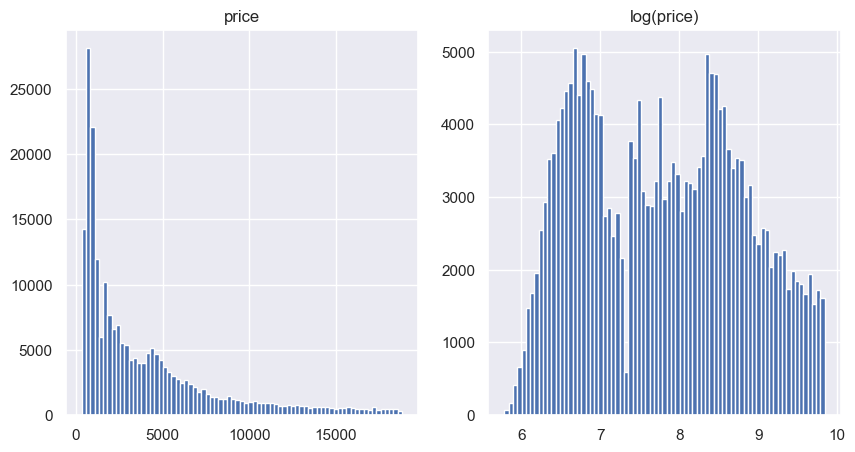

In [34]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(all_data['price'], bins=75)
plt.title('price')

plt.subplot(1, 2, 2)
plt.hist(all_data['price'].apply(np.log), bins=75)
plt.title('log(price)')

plt.show()

We can see how applying the logarithm to our target gets gaussian like, so if we want to predict the price value, it will be easier in the logarithm form and later transform our predictions to normal values.

## Correlations

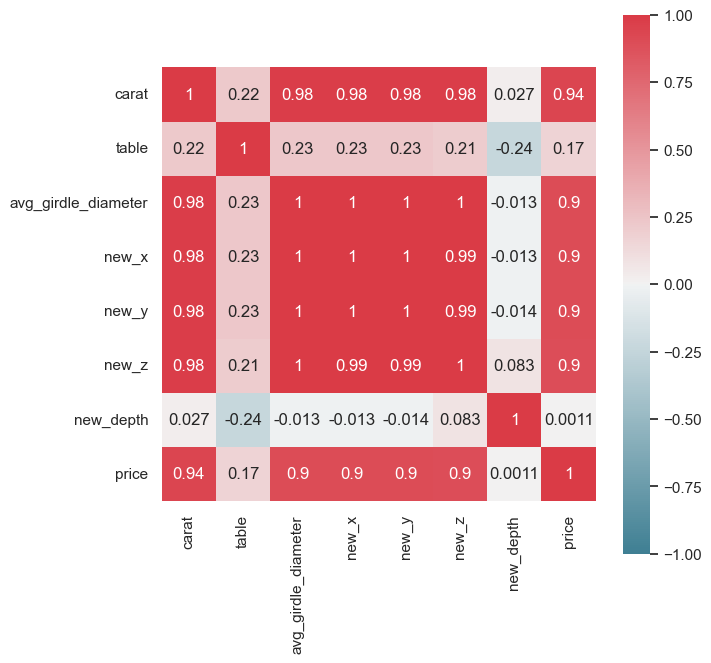

In [35]:
correlation_vars = ['carat', 'table', 'avg_girdle_diameter', 'new_x', 'new_y', 'new_z', 'new_depth', 'price']

plt.figure(figsize=(7, 7))
sns.heatmap(all_data[correlation_vars].corr(),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, annot=True)
plt.show()

We have the correlations:
+ avg_girdle_diameter, new_x,  new_y, new_z, are highly correlated with each other because all of they depends from the proportions of the CZ.
+ Carat is also correlated with avg_girdle_diameter, new_x,  new_y, new_z, due to bigger the CZ, greater the mass.
+ The price is highly correlated with the carat and the dimension variables. Which will make the difference will be the other 3Cs: cut, color, and clarity.

Let see all the correlations graphically in the next comparison graph.

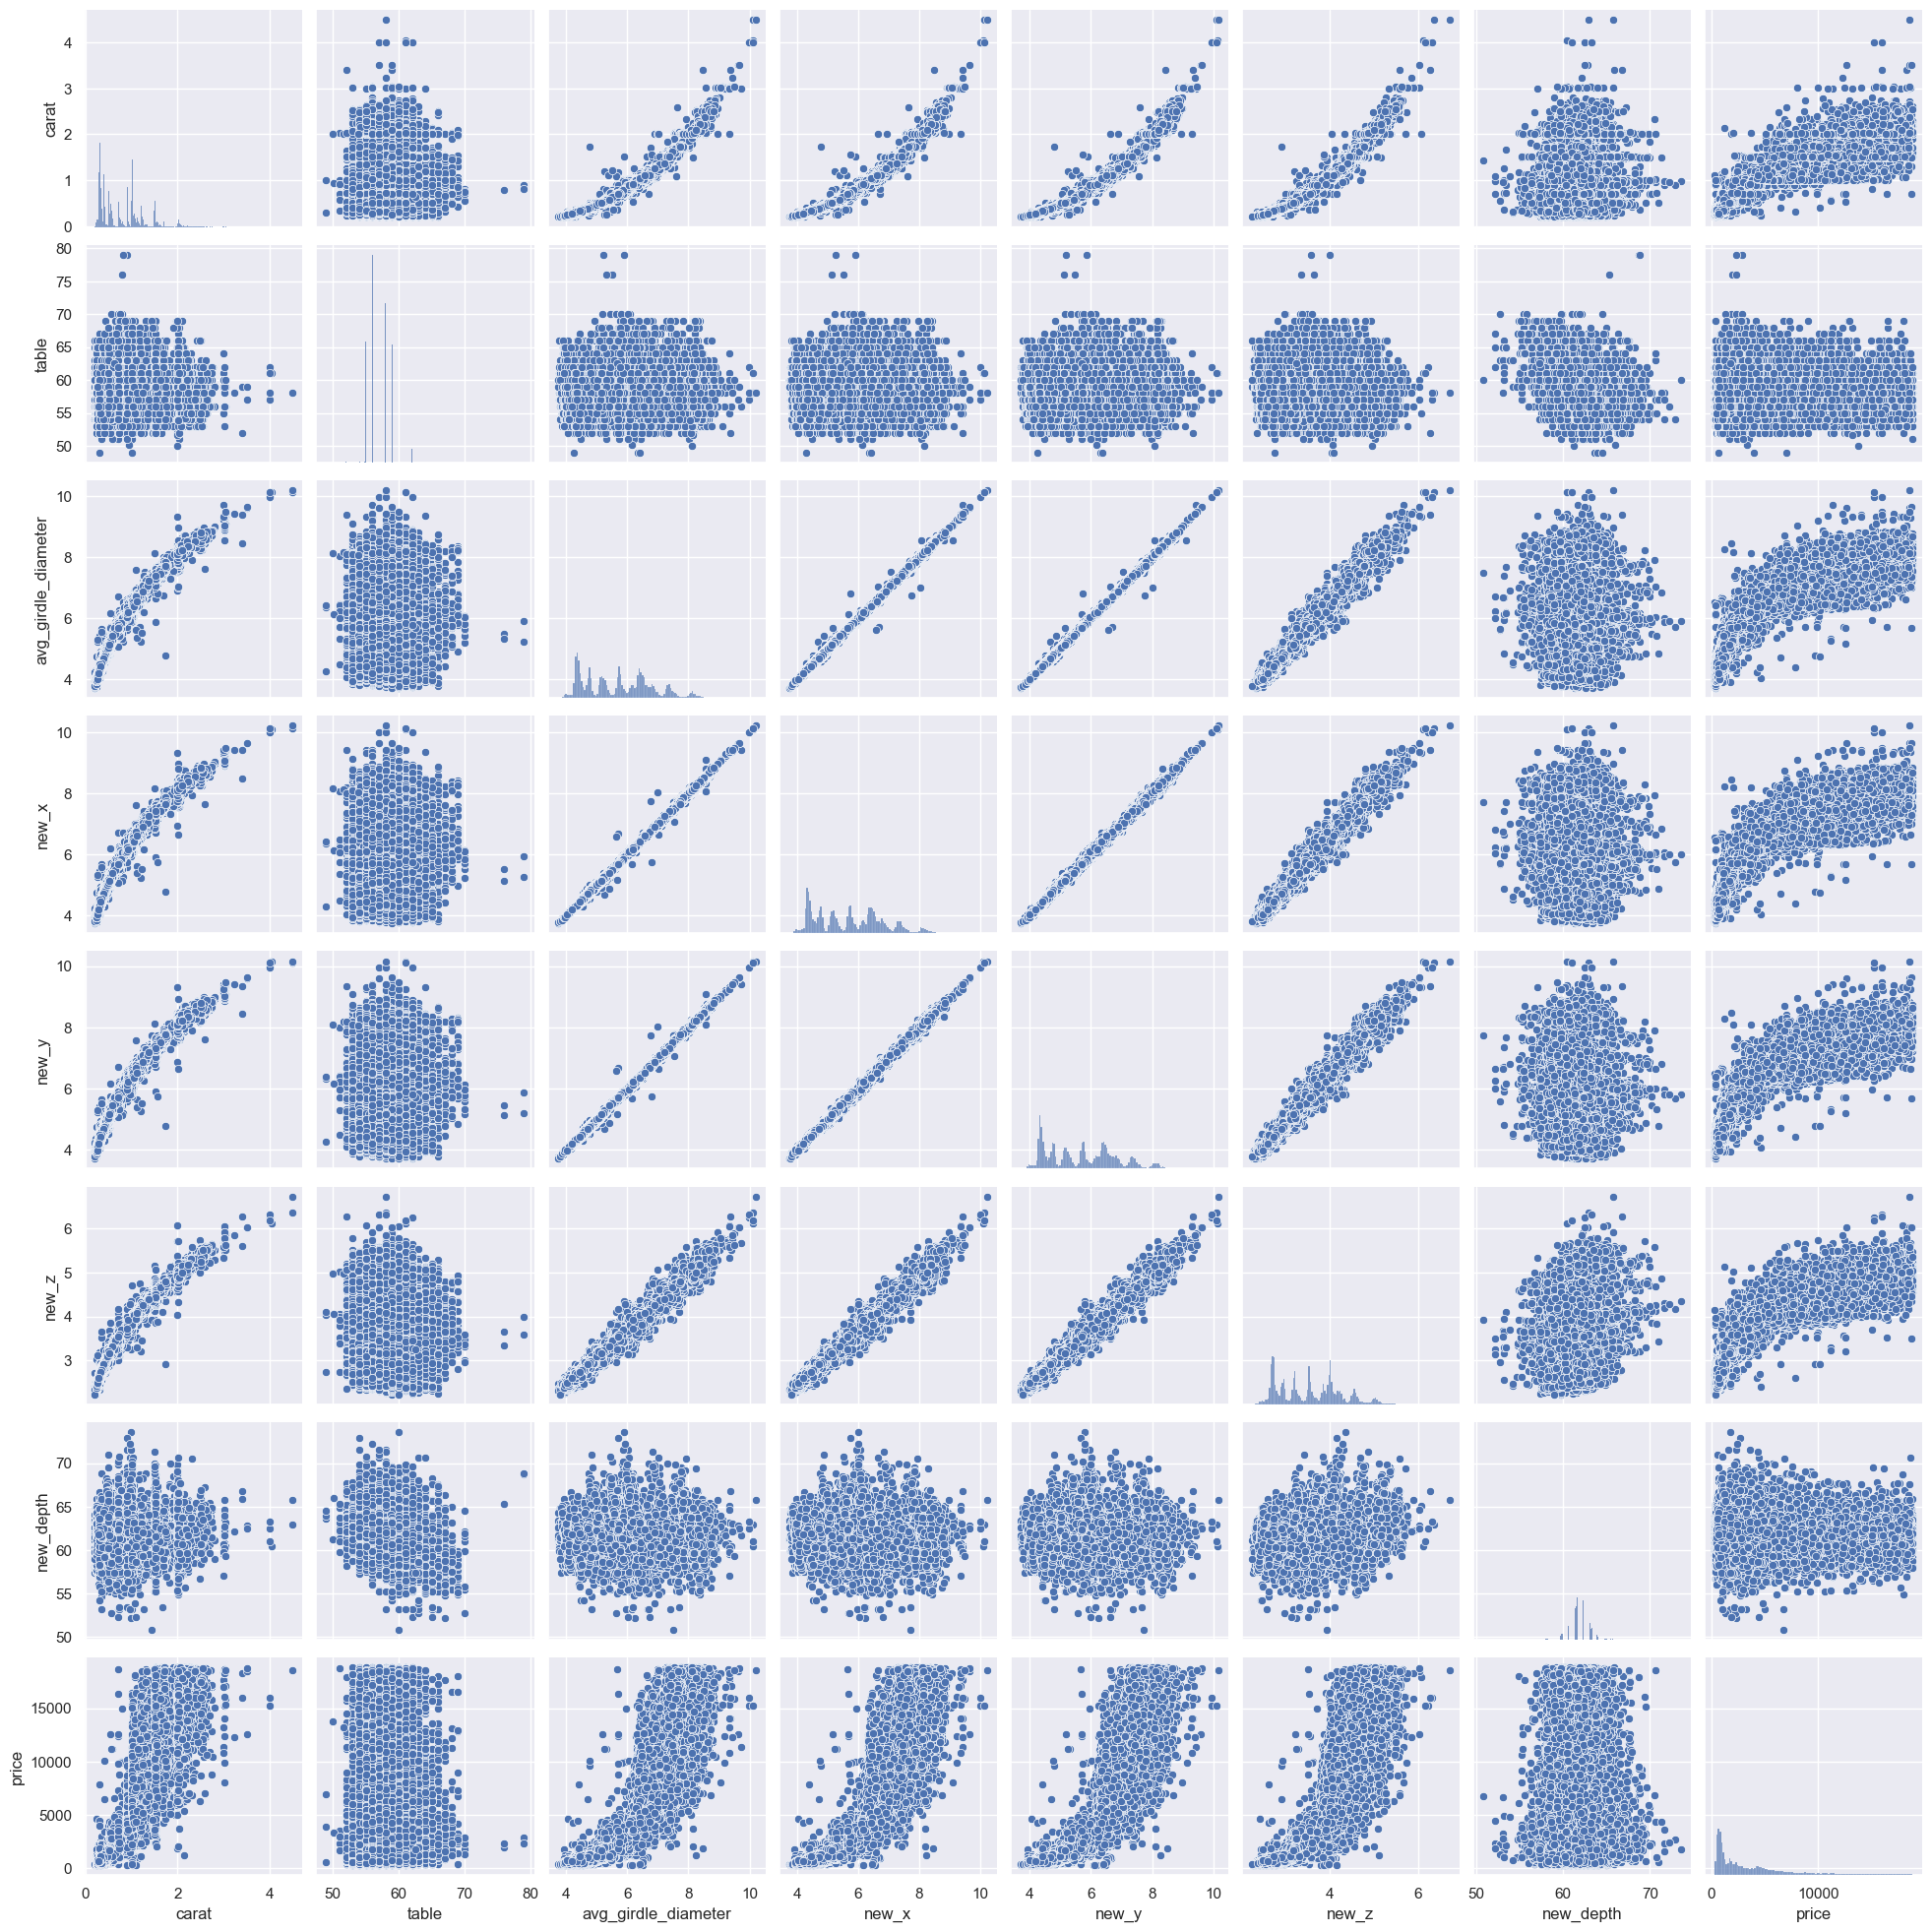

In [36]:
sns.pairplot(data=all_data[correlation_vars])

All the correlations are shown better now
+ avg_girdle_diameter, x, and y are basically the same, since $x \approx y$ and avg_girdle_diameter is the mean of $x$ and $y$
+ z is avg_girdle_diameter, x, and y multiplied by a constant of proportionality
+ Carat is highly correlated with avg_girdle_diameter, x, y, and z by the volumen and mass correlation.

# Carat vs Price

We are going to review the correlation between price and carat in the next figure

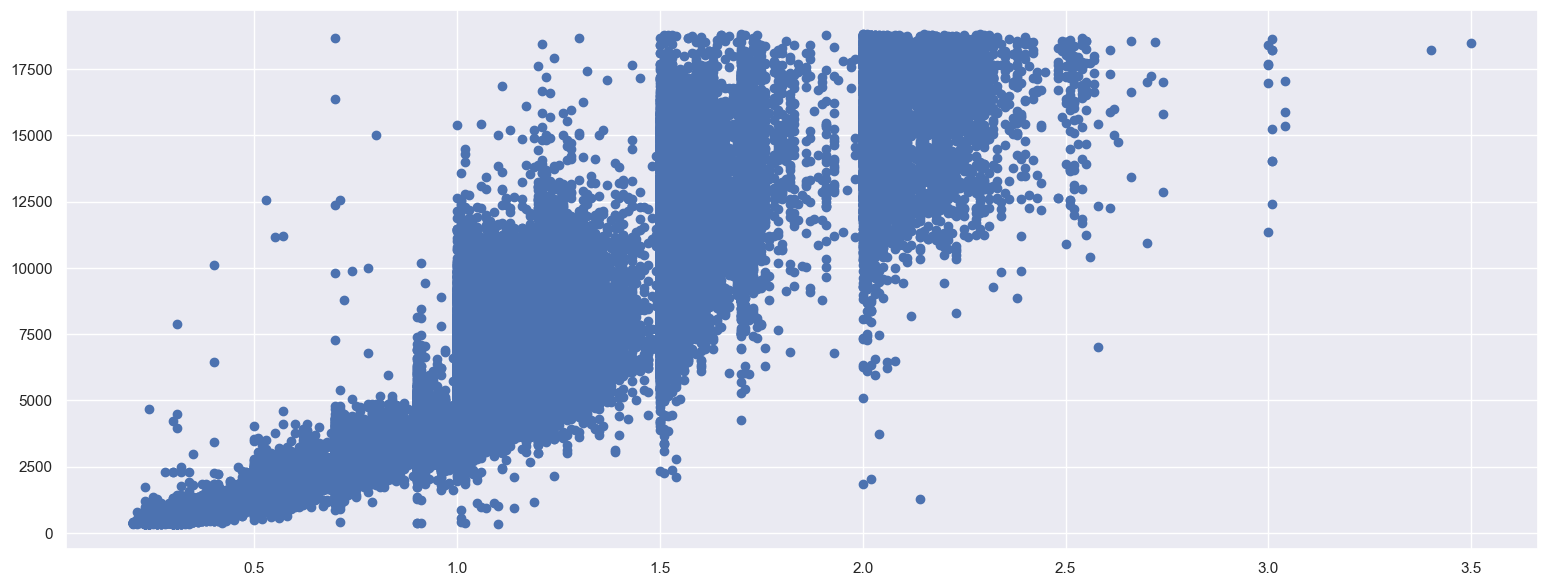

In [37]:
plt.figure(figsize=(19, 7))
plt.scatter(train['carat'], train['price'])
plt.show()

Is interesting how we have carat value segmentations in our data. Those bounds in 0.5, 0.7, 0.9, 1, 1.25, 1.5 for multiple prices must be given for a kind of usual market sizes. In the next section, we review the price distribution depending of the categorical variables (cut, color, and clarity) and those carat standars intervals.

In the other hand, if we apply the logarithm to price and carat, we have the next result

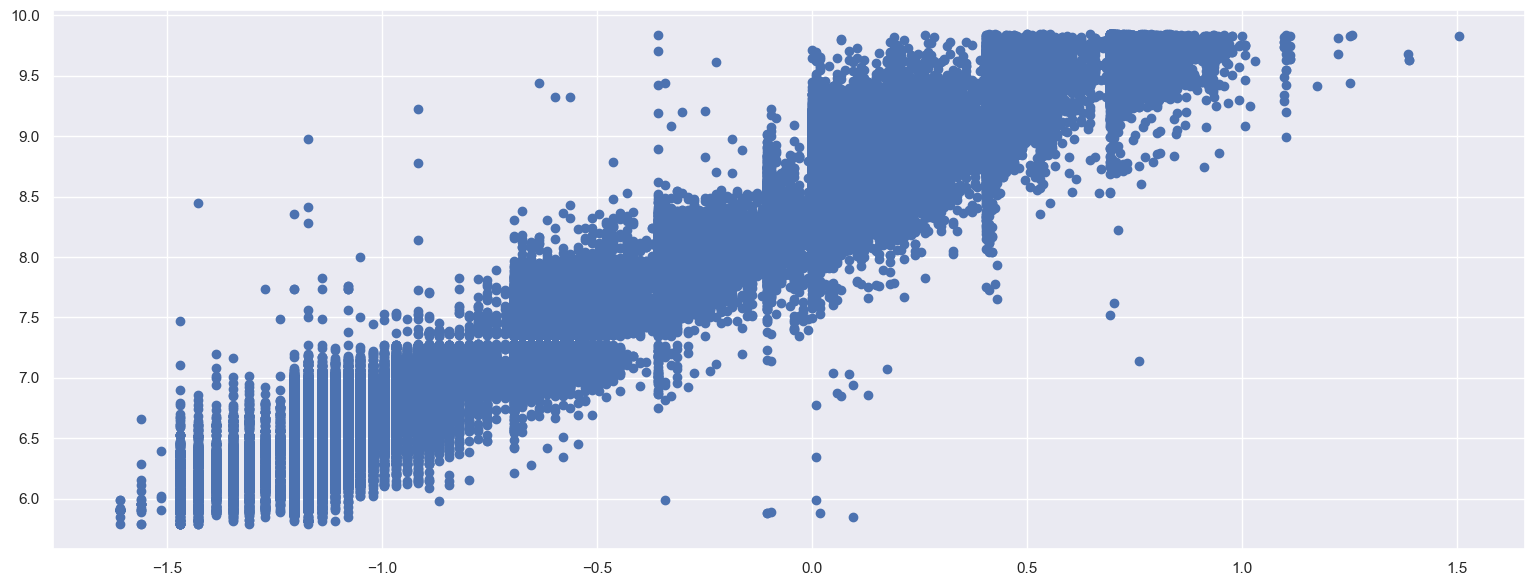

In [38]:
plt.figure(figsize=(19, 7))
plt.scatter(all_data['carat'].apply(np.log), all_data['price'].apply(np.log))
plt.show()

For this case, we have a more linear relationship between these variables

## Price vs cut, color, and clarity by carat bins

In this section, we will representante the price distribution for each value of cut, color and clirity segmented by carat cuts.

In [39]:
carat_intervals = pd.cut(all_data['carat'], bins=[0, 0.5, 0.7, 0.9, 1, 1.25, 1.5, 2, 2.5, np.inf])

### Price vs cut by carat

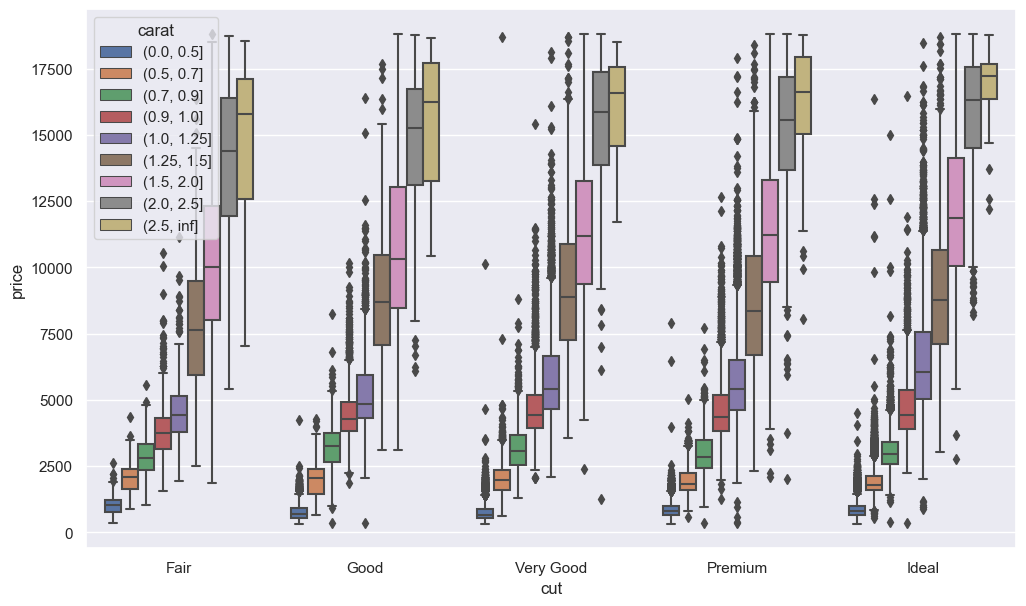

In [40]:
cut_orders = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
plt.figure(figsize=(12, 7))
sns.boxplot(x=all_data['cut'], y=all_data['price'], hue=carat_intervals, order=cut_orders)
plt.show()

For the lowest carat values, the cut is not importan, due to they are too small to make diferences in the final piece. But when the carat is getting greater, those cut differences are more visible, for example, for the interval $(1.5, 2.0]$, to better cut correspond greater prices (maybe it is due to the greater gems are more suitable to principal components in the jewelry and then the cut is more important).

### Price vs color by carat

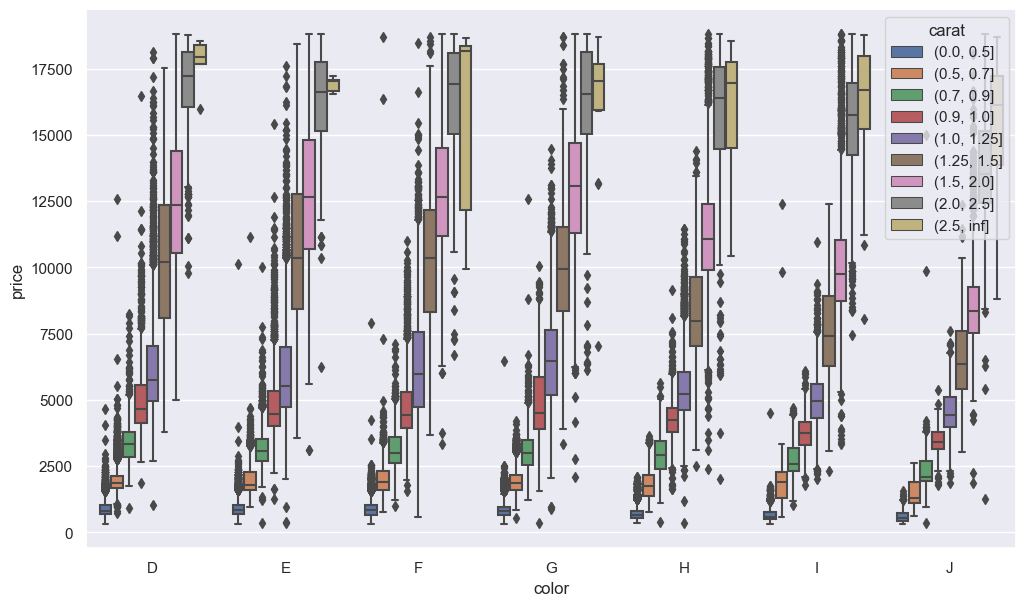

In [41]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=all_data['color'], y=all_data['price'], hue=carat_intervals, order=np.sort(all_data['color'].unique()))
plt.show()

For this case, we have a similar situation as before: in smaller carats, the color is not important, the mean price is the same in all of them, the affected element is the variability, since in the smallest carats and greater color we have a bigger range of values than in the poorest colors.

### Price vs clarity by carat

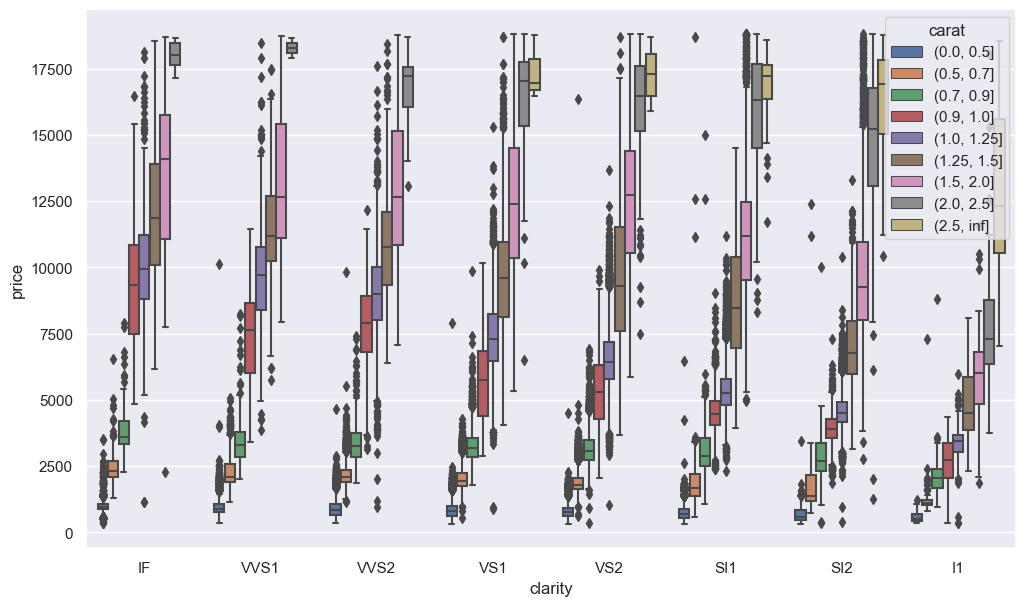

In [42]:
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
plt.figure(figsize=(12, 7))
sns.boxplot(x=all_data['clarity'], y=all_data['price'], hue=carat_intervals, order=clarity_order)
plt.show()

This feature is one of the most important, since there is a big difference between the prices of the best and worst clarities.

In the case of carat in the range $(1.5, 2.0]$, the price is slighly lower from VVS1 to VVS2, so maybe we will need to use the clarity label without the possition of the impurities (only the letters), and use other variables to indicate the impurity possitions (the numbers 1 and 2).

# Dataset generated

We will save the data from this notebook, thus we did several transformations in our data.

In [43]:
all_data.to_parquet('./data/all_data.parquet')